Modify the code below so that words ending in "to" will get the plural ending in "oes" . This will fix words like "potato" and "tomato" but will generate some error like for "staccato" ...

In [13]:
# Copyright 2016-2020 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
#

# For general information on the Pynini grammar compilation library, see
# pynini.opengrm.org.
"""Sketch of English noun plurals using priority union."""

import pynini
from pynini.lib import pynutil
from pynini.lib import rewrite


def _priority_union(q: pynini.Fst, r: pynini.Fst,
                    sigma: pynini.Fst) -> pynini.Fst:
  complement_domain_q = sigma - pynini.project(q, "input")
  return pynini.union(q, complement_domain_q @ r)


# The inventory.

_v = pynini.union("a", "e", "i", "o", "u")
_c = pynini.union("b", "c", "d", "f", "g", "h", "j", "k", "l", "m", "n", "p",
                  "q", "r", "s", "t", "v", "w", "x", "y", "z")
_sigma = pynini.union(_v, _c).closure().optimize()

# The rules.
# TODO(kbg):
# * More Latin and Greek plurals
# * "oes" plurals as in "potatoes" etc.
# * Doubling of a final consonant as in "busses" etc.

_suppletive = pynini.string_map([
    # Zero plurals.
    "deer",
    "fish",
    "sheep",
    # Stem changes.
    ("foot", "feet"),
    ("goose", "geese"),
    ("man", "men"),
    ("mouse", "mice"),
    ("tooth", "teeth"),
    ("woman", "women"),
    # Irregular suffixes.
    ("child", "children"),
    ("ox", "oxen"),
    # f -> v.
    ("wife", "wives"),
    ("wolf", "wolves"),
    # A few Greek and Latin plurals.
    ("analysis", "analyses"),
    ("criterion", "criteria"),
    ("focus", "foci")
])
### BEGIN SOLUTION ###
_to = _sigma + "to" + pynutil.insert("es")
### END SOLUTION ###
_ies = _sigma + _c + pynini.cross("y", "ies")
_es = _sigma + pynini.union("s", "sh", "ch", "x", "z") + pynutil.insert("es")
_s = _sigma + pynutil.insert("s")

# These rules need to bleed each other so they are combined using
# priority union.
_plural = _priority_union(
    _suppletive, 
    ### BEGIN SOLUTION ###
        _priority_union(_to,
    ### END SOLUTION ###
            _priority_union(_ies, _priority_union(_es, _s, _sigma),
                                     _sigma), _sigma), _sigma).optimize()
#_plural = _priority_union(
#    _suppletive, _priority_union(_ies, _priority_union(_es, _s, _sigma),
#                                 _sigma), _sigma).optimize()

def plural(singular: str) -> str:
  return rewrite.one_top_rewrite(singular, _plural)

In [14]:
plural("potato")

'potatoes'

In [23]:
plural("tomato")

'staccatoes'

In [16]:
plural("sky")

'skies'

In [17]:
plural("cat")

'cats'

Let's now draw some FSTs and examine them. _ies and _to

In [19]:
# this is needed in pynini to properly draw FST
def _draw(fst: pynini.Fst, sym: pynini.SymbolTable) -> pynini.Fst:
      fst.set_input_symbols(sym)
      fst.set_output_symbols(sym)
      return fst
    
sym = pynini.SymbolTable.read_text("./Documents/byte.sym")

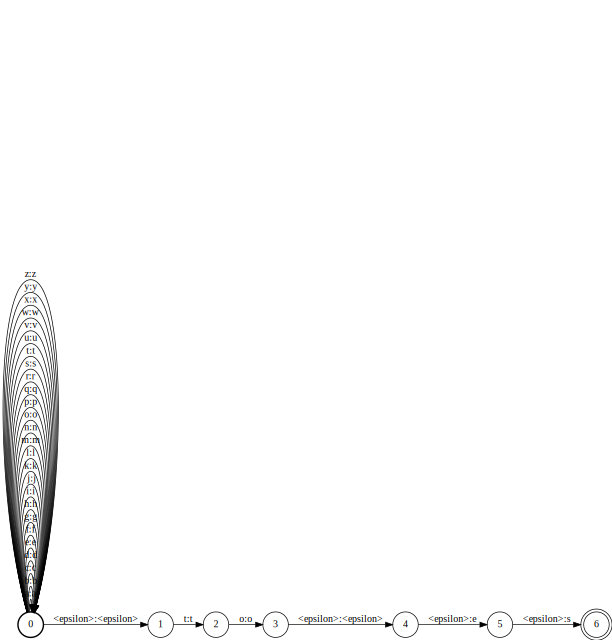

In [21]:
_draw(_to, sym)
_to

What are all the links starting and pointing to state 0? 

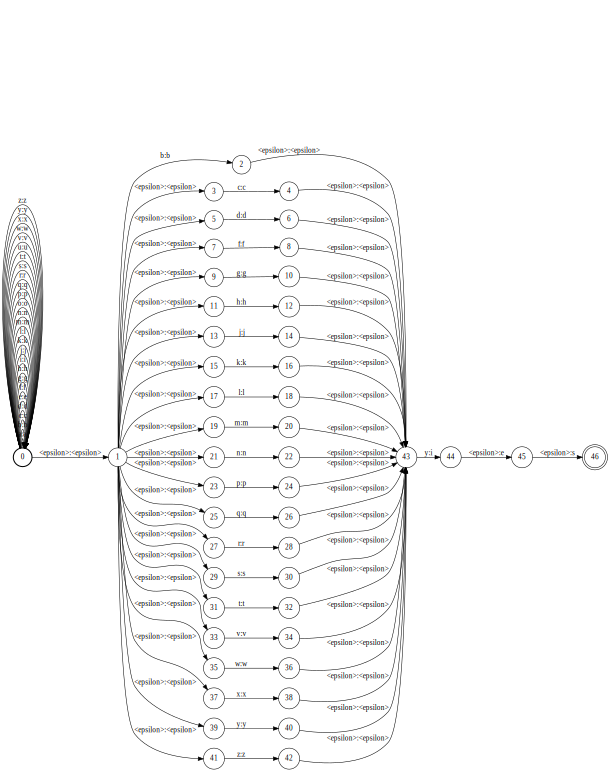

In [22]:
_draw(_ies, sym)
_ies